Missing values in each column:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Cost              0
Price             0
Profit            0
Quantity          0
Sales             0
dtype: int64
Summary Statistics:
              Row ID        Order ID                     Order Date  \
count   9794.000000            9794                           9794   
unique          NaN            4921                            NaN   
top             NaN  CA-2018-100111                            NaN   
freq            NaN              14                            NaN   
mean    4902.849295             NaN  2017-05-01 06:15:57.157443584   
min        1.000000             NaN            2015-01-03 00:00:00   
25% 

/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

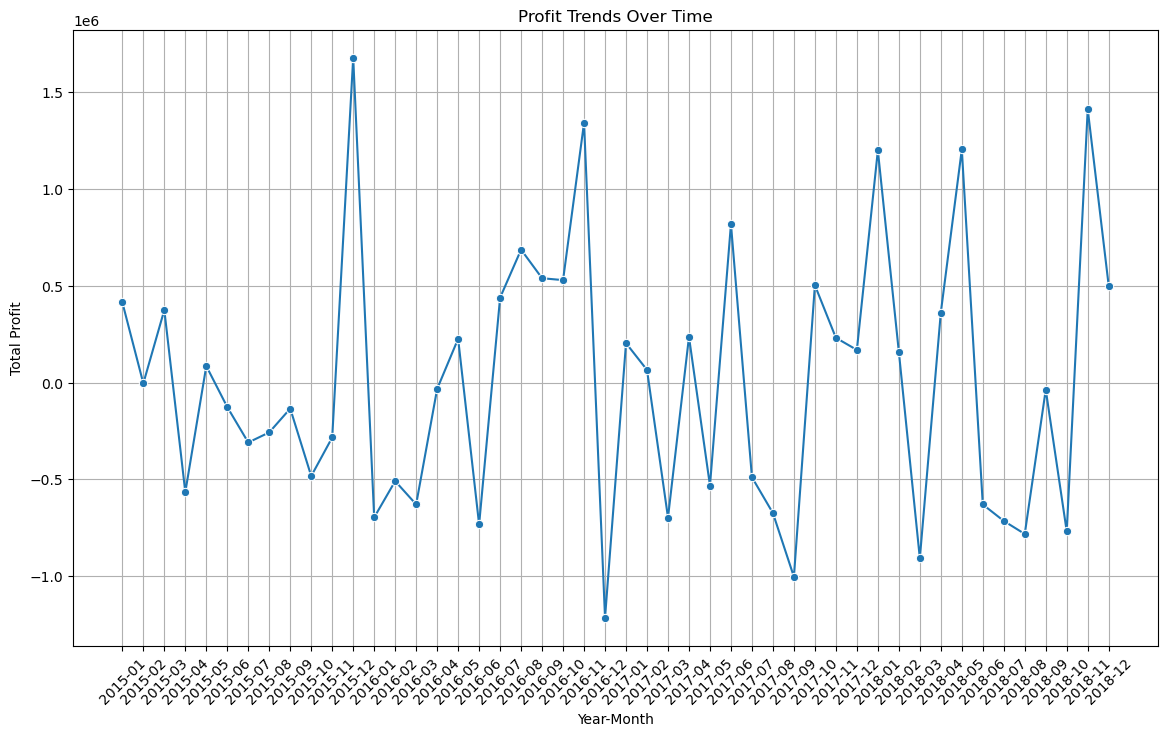

/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

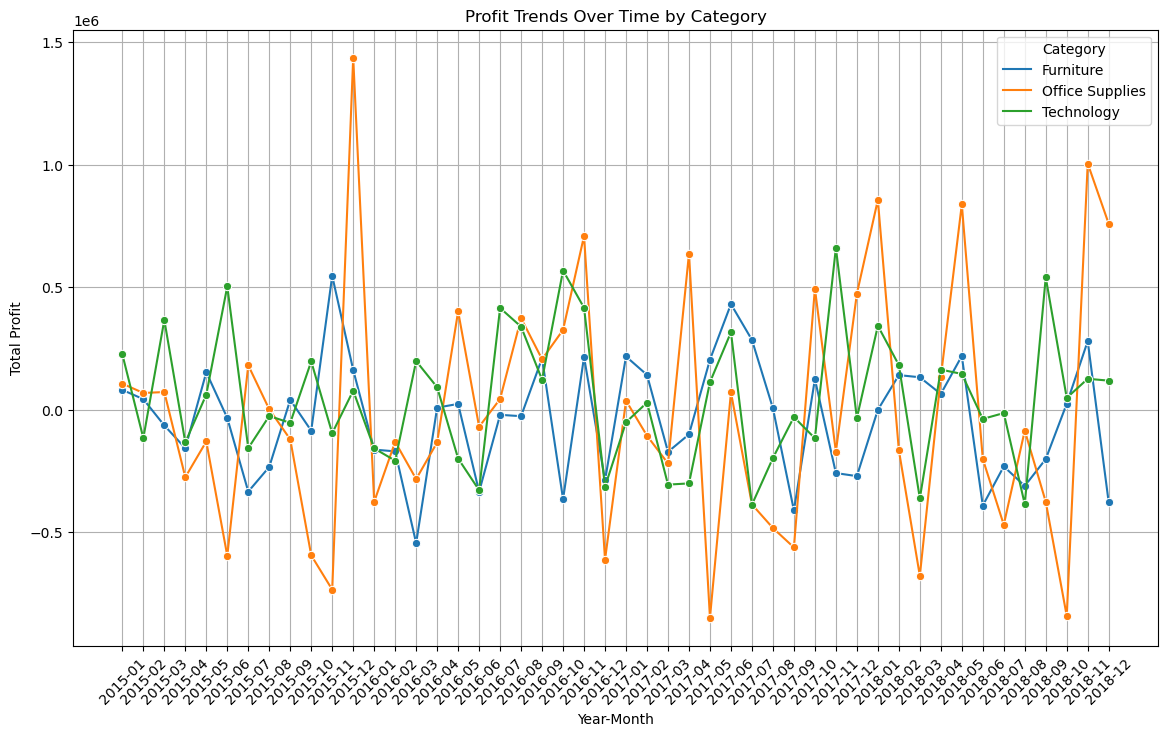

/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


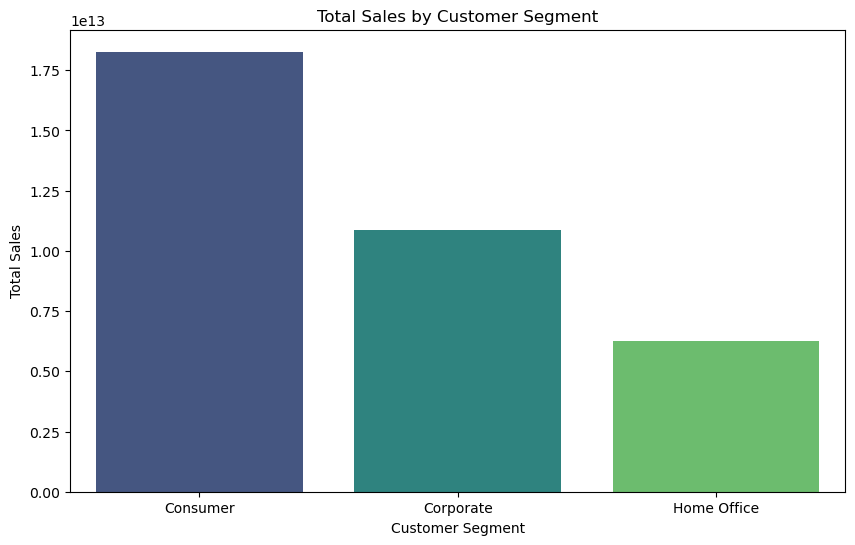

/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ioanneskatsires/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

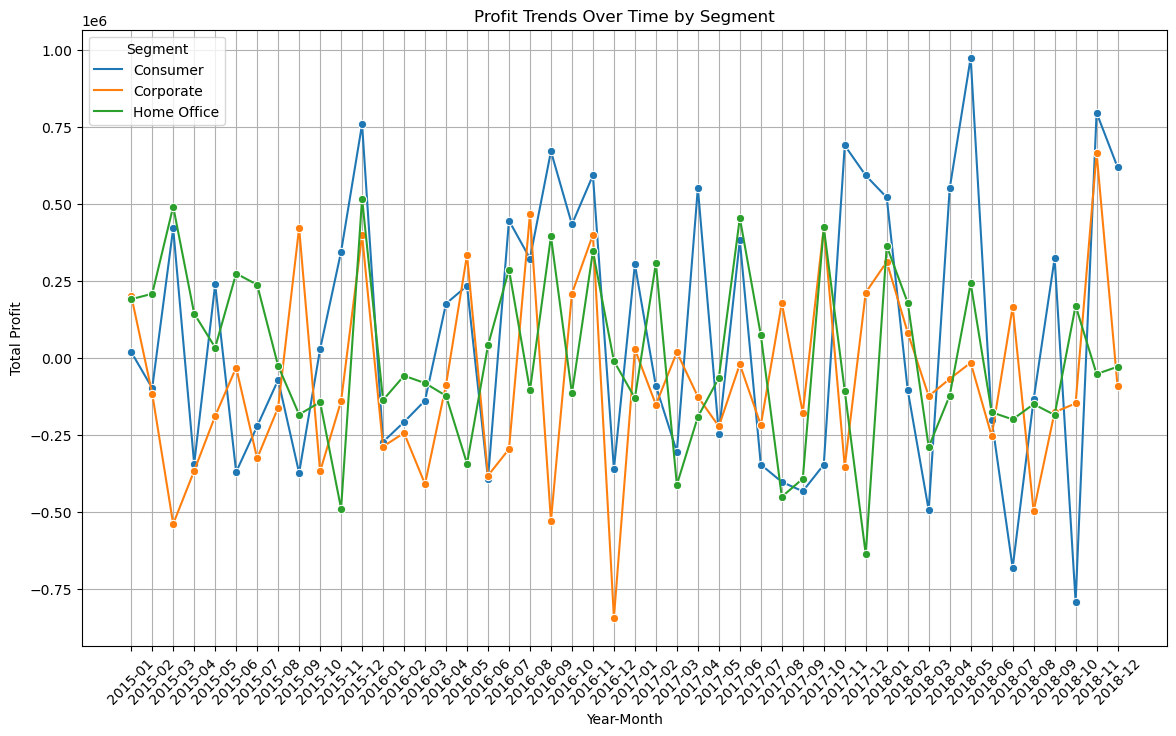

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Correcting Data Types
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%y')

# Convert 'Sales' and 'Profit' to numeric after replacing '.' with ''
data['Sales'] = data['Sales'].str.replace('.', '').astype(float)
data['Profit'] = data['Profit'].astype(str)  # Convert 'Profit' to string type
data['Profit'] = data['Profit'].str.replace('.', '').astype(float)
data['Cost'] = data['Cost'].astype(float)
data['Price'] = data['Price'].astype(float)

# Handling Missing Values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Summary statistics
summary_stats = data.describe(include='all')
print("Summary Statistics:\n", summary_stats)

# Analyzing sales and profit trends
data['YearMonth'] = data['Order Date'].dt.to_period('M')

# Aggregating profit by YearMonth
profit_trends = data.groupby('YearMonth')['Profit'].sum().reset_index()

# Converting 'YearMonth' to string for plotting purposes
profit_trends['YearMonth'] = profit_trends['YearMonth'].astype(str)

# Plotting profit trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='YearMonth', y='Profit', data=profit_trends, marker='o')
plt.title('Profit Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Aggregating profit by YearMonth and Category
profit_trends_category = data.groupby(['YearMonth', 'Category'])['Profit'].sum().reset_index()

# Converting 'YearMonth' to string for plotting purposes
profit_trends_category['YearMonth'] = profit_trends_category['YearMonth'].astype(str)

# Plotting profit trends over time by category
plt.figure(figsize=(14, 8))
sns.lineplot(x='YearMonth', y='Profit', hue='Category', data=profit_trends_category, marker='o')
plt.title('Profit Trends Over Time by Category')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.show()

# Aggregating sales by Segment
sales_by_segment = data.groupby('Segment')['Sales'].sum().reset_index()

# Plotting sales by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=sales_by_segment, palette='viridis')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

# Aggregating profit by YearMonth and Segment
profit_trends_segment = data.groupby(['YearMonth', 'Segment'])['Profit'].sum().reset_index()

# Converting 'YearMonth' to string for plotting purposes
profit_trends_segment['YearMonth'] = profit_trends_segment['YearMonth'].astype(str)

# Plotting profit trends over time by segment
plt.figure(figsize=(14, 8))
sns.lineplot(x='YearMonth', y='Profit', hue='Segment', data=profit_trends_segment, marker='o')
plt.title('Profit Trends Over Time by Segment')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.grid(True)
plt.show()


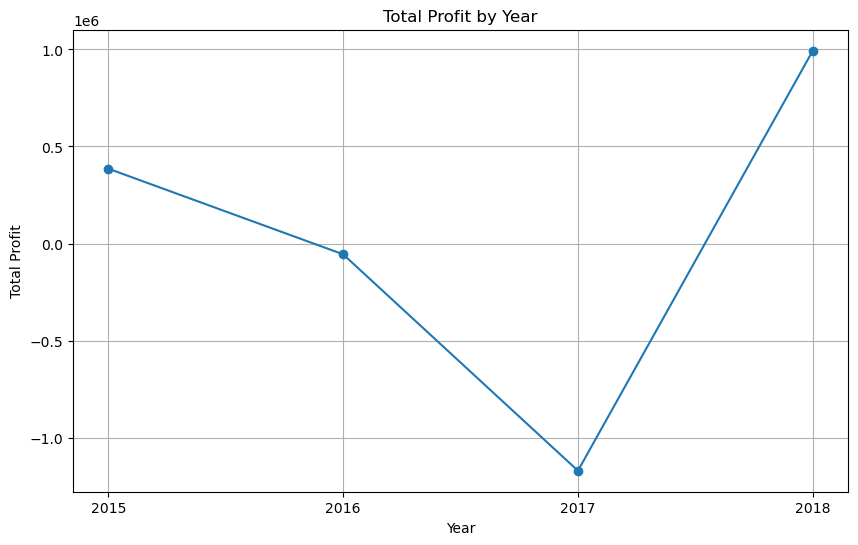

In [31]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%y')
data['Year'] = data['Order Date'].dt.year

# Calculate the total profit for each year
yearly_profit = data.groupby('Year')['Profit'].sum().reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_profit['Year'], yearly_profit['Profit'], marker='o')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.xticks(yearly_profit['Year'])  # Ensure all years are shown as ticks
plt.show()

In [35]:
pip install geopandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 15.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 14.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.2 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install fiona shapely pyproj rtree


Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install geopandas geopy matplotlib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install geopandas geopy matplotlib tqdm


Note: you may need to restart the kernel to use updated packages.


100%|██████████| 600/600 [03:55<00:00,  2.55it/s]
/var/folders/wf/cjvygh994j3ftx3ng509sd6r0000gn/T/ipykernel_40782/1468095606.py:34: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


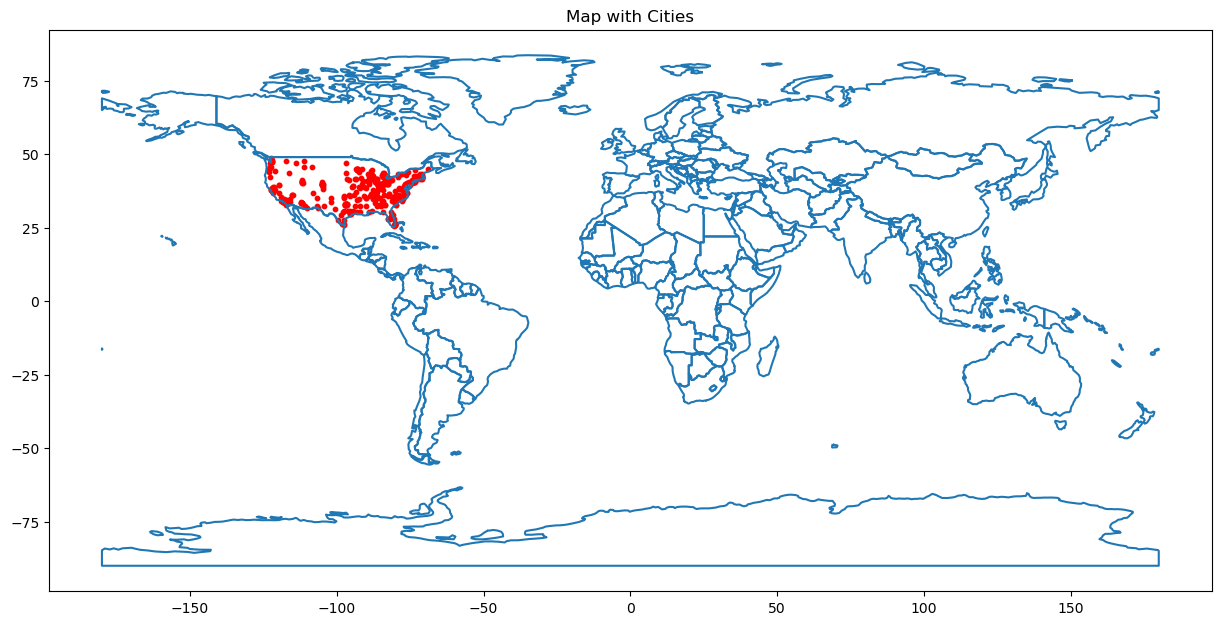

In [53]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from tqdm import tqdm

# Load the data
data = pd.read_csv('data.csv', sep=';', encoding='latin1')

# Extract city and state columns
city_data = data[['City', 'State']].drop_duplicates()

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get latitude and longitude
def geocode(city, state):
    try:
        location = geolocator.geocode(f"{city}, {state}")
        return location.latitude, location.longitude
    except:
        return None, None

# Apply geocoding
tqdm.pandas()  # to show progress
city_data[['Latitude', 'Longitude']] = city_data.progress_apply(
    lambda row: geocode(row['City'], row['State']), axis=1, result_type='expand'
)

# Drop rows with missing coordinates
city_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Plot the map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
plt.scatter(city_data['Longitude'], city_data['Latitude'], color='red', s=10)
plt.title('Map with Cities')
plt.show()


100%|██████████| 600/600 [16:19<00:00,  1.63s/it]  
/var/folders/wf/cjvygh994j3ftx3ng509sd6r0000gn/T/ipykernel_56407/3572307993.py:30: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


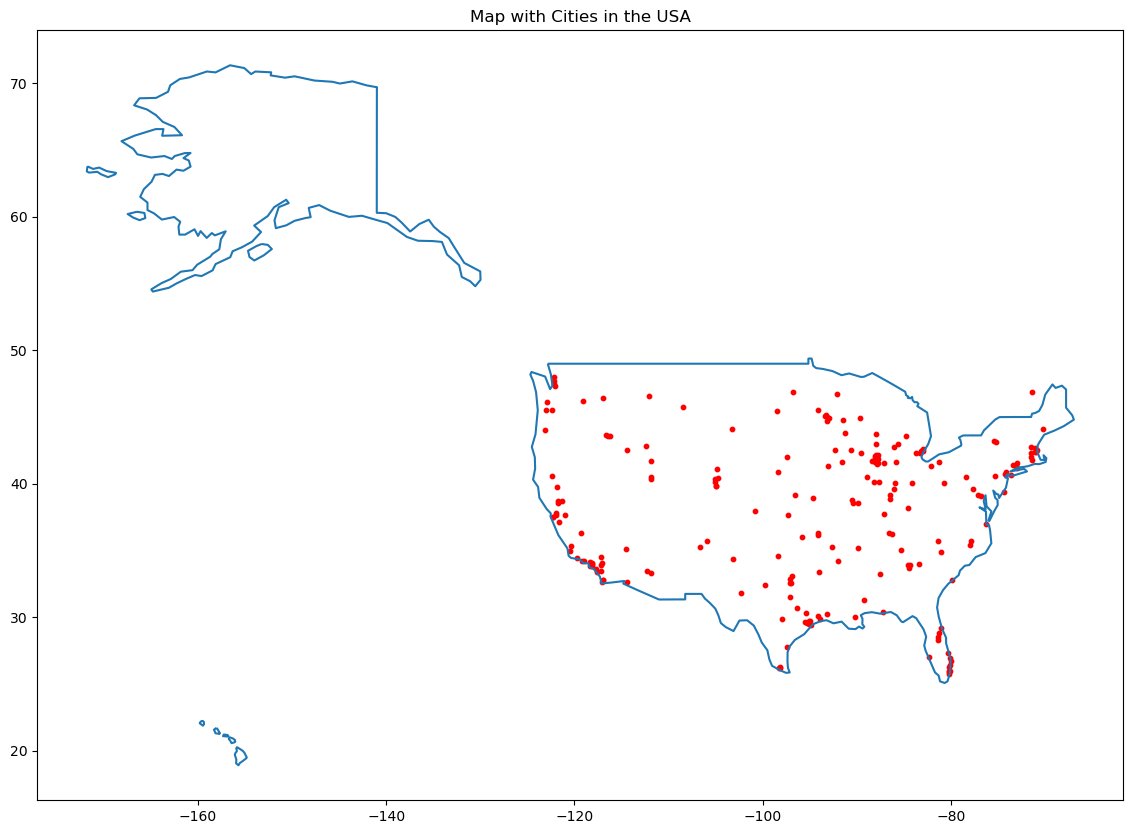

In [23]:
file_path = '/Users/ioanneskatsires/Desktop/data.csv'

# Load the data
data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Extract city and state columns
city_data = data[['City', 'State']].drop_duplicates()

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get latitude and longitude
def geocode(city, state):
    try:
        location = geolocator.geocode(f"{city}, {state}")
        return location.latitude, location.longitude
    except:
        return None, None

# Apply geocoding
tqdm.pandas()  # to show progress
city_data[['Latitude', 'Longitude']] = city_data.progress_apply(
    lambda row: geocode(row['City'], row['State']), axis=1, result_type='expand'
)

# Drop rows with missing coordinates
city_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Plot the map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world.name == "United States of America"]

fig, ax = plt.subplots(figsize=(15, 10))
usa.boundary.plot(ax=ax)
plt.scatter(city_data['Longitude'], city_data['Latitude'], color='red', s=10)
plt.title('Map with Cities in the USA')
plt.show()
